# **WIP**

3 Topics: (Undecided)
  1. Impact of AI on teaching and learning
  2. Ethical concerns about AI in education
  3. Implementation of AI in education tools

## **Download required libraries**

In [ ]:
!pip install gensim
!pip install pyLDAvis
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


## **Download stopwords from nltk**

## **Import required libraries**

In [ ]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# vis
import pyLDAvis
import pyLDAvis.gensim

## **Data preprocessing**

In [ ]:
import re
import pandas as pd

# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"  # Enclosed characters
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Load the dataset
df = pd.read_csv("AI in edu dataset - Sheet1.csv")

# Remove null values
df = df.dropna(subset=['Content'])

# Remove all columns except content
df = df['Content']

# Remove newlines from content
df = df.map(lambda x: re.sub(r'\n', '', x))

# Remove punctuation
df = df.map(lambda x: re.sub('[,\.!?]', '', x))

# Convert to lowercase
df = df.map(lambda x: x.lower())

# Remove emojis
df = df.map(lambda x: remove_emojis(x))

# Display the first few rows of the preprocessed data
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:34: DeprecationWarning: invalid escape sequence '\.'
<>:34: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-4-7a72b082410f>:34: DeprecationWarning: invalid escape sequence '\.'
  df = df.map(lambda x: re.sub('[,\.!?]', '', x))


,Content
0,the education system that ai will destroy will...
1,ai tool sare very helpful but you need to use ...
2,ai and teachers should join forces in a collab...
3,kids that learn how to use the ai will realize...
4,but here’s the thing if we embrace the ai how ...


## **Data Exploration**

### **Using a Wordcloud to get the most common words in the data**


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


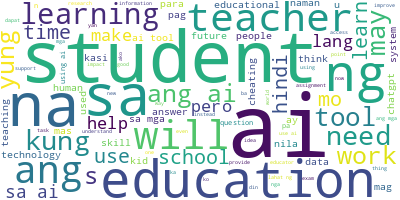

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## **Data Preparation for LDA**

## **Lemmatization and removal of stopwords**

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

english_stop_words = set(stopwords.words('english'))
tagalog_stop_words = set()
with open('tagalog_stop_words.txt', 'r') as file:
  for line in file:
    tagalog_stop_words.add(line.strip())

# Combine English and Tagalog stop words into one set
combined_stop_words = english_stop_words.union(tagalog_stop_words)

# Function to process each document (tokenization, stopword removal, lemmatization)
def preprocess(document):
  tokens = gensim.utils.simple_preprocess(str(document), deacc=True)
  tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in combined_stop_words]
  return tokens

# Convert the DataFrame content into a list of documents
data = df.values.tolist()

processed_data = [preprocess(doc) for doc in data]

# Display the first 5 processed documents
print(processed_data[:5])

#def sent_to_words(sentences):
#  for sentence in sentences:
#    # deacc=True removes punctuations
#    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

#def remove_stopwords(texts):
#  return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

#data = df.values.tolist()
#data_words = list(sent_to_words(data))

# Remove stopwords
#data_words = remove_stopwords(data_words)

#print(data_words[:1][0][:30])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['education', 'system', 'ai', 'destroy', 'system', 'adapt', 'change', 'world', 'ai'], ['ai', 'tool', 'sare', 'helpful', 'need', 'use', 'properly', 'going', 'replace', 'human', 'still', 'need', 'human', 'touch'], ['ai', 'teacher', 'join', 'force', 'collaborative', 'effort', 'revolutionize', 'education', 'ai', 'teacher', 'empower', 'student', 'best'], ['kid', 'learn', 'use', 'ai', 'realize', 'career', 'obsolete', 'ai', 'take', 'smarter', 'path'], ['thing', 'embrace', 'ai', 'student', 'ever', 'learn', 'form', 'opinion', 'ask', 'ai', 'form']]


## **Dictionary and corpus creation**

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(processed_data)

# Create Corpus
corpus = [id2word.doc2bow(text) for text in processed_data]

# Display Results
print(corpus[:1][0][:15])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **LDA Model Training**

### **Multi-core training**

In [118]:
from pprint import pprint

# Build LDA Model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=5, passes=10)

# Print the keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.053*"ai" + 0.022*"student" + 0.013*"tool" + 0.012*"education" + '
  '0.011*"mo" + 0.010*"teacher" + 0.010*"work" + 0.008*"yung" + '
  '0.007*"learning" + 0.007*"school"'),
 (1,
  '0.037*"ai" + 0.013*"education" + 0.008*"ma" + 0.008*"pag" + 0.007*"school" '
  '+ 0.006*"yung" + 0.005*"need" + 0.005*"learning" + 0.005*"teacher" + '
  '0.005*"estudyante"'),
 (2,
  '0.024*"ai" + 0.017*"student" + 0.007*"learn" + 0.006*"teaching" + '
  '0.006*"use" + 0.005*"learning" + 0.005*"gpt" + 0.005*"chat" + '
  '0.005*"traditional" + 0.005*"method"'),
 (3,
  '0.052*"ai" + 0.019*"student" + 0.011*"teacher" + 0.009*"education" + '
  '0.008*"using" + 0.008*"time" + 0.007*"technology" + 0.006*"need" + '
  '0.005*"tool" + 0.005*"skill"'),
 (4,
  '0.044*"ai" + 0.031*"student" + 0.026*"learning" + 0.012*"education" + '
  '0.010*"need" + 0.010*"teacher" + 0.009*"personalized" + 0.007*"help" + '
  '0.005*"experience" + 0.005*"educational"')]


### **Single-core training**


In [108]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=5, id2word=id2word, passes=10, alpha='auto', eta='auto')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## **Display Topics**

In [65]:
num_topics = lda_model.num_topics

# Print each topic with its top words
for topic_id in range(num_topics):
    topic_terms = lda_model.show_topic(topic_id, topn=10)  # Get top 10 words for each topic
    print(f"Topic #{topic_id}:")
    print(", ".join([f"{word} ({round(weight, 4)})" for word, weight in topic_terms]))
    print()

Topic #0:
ai (0.053300000727176666), education (0.020899999886751175), student (0.018799999728798866), learning (0.012600000016391277), tool (0.010599999688565731), technology (0.009800000116229057), use (0.00839999970048666), using (0.007899999618530273), teacher (0.006300000008195639), need (0.006300000008195639)

Topic #1:
ai (0.05719999969005585), yung (0.01549999974668026), student (0.011300000362098217), work (0.01119999960064888), teacher (0.01119999960064888), mo (0.009600000455975533), mag (0.00860000029206276), tool (0.007799999788403511), use (0.006300000008195639), education (0.006099999882280827)

Topic #2:
ai (0.041600000113248825), student (0.030799999833106995), learning (0.01850000023841858), teacher (0.009999999776482582), education (0.009600000455975533), help (0.008100000210106373), learn (0.007300000172108412), need (0.0071000000461936), system (0.005400000140070915), use (0.005400000140070915)

Topic #3:
ai (0.021800000220537186), make (0.008700000122189522), tool

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [66]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.104116 -0.069967       1        1  26.877503
2     -0.091121 -0.021308       2        1  25.893779
0     -0.065620 -0.021286       3        1  22.909792
4      0.034176  0.118886       4        1  15.652471
3      0.018449 -0.006326       5        1   8.666456, topic_info=          Term        Freq       Total Category  logprob  loglift
1506      yung   36.000000   36.000000  Default  30.0000  30.0000
25     student  153.000000  153.000000  Default  29.0000  29.0000
1539       mag   23.000000   23.000000  Default  28.0000  28.0000
128   learning   70.000000   70.000000  Default  27.0000  27.0000
94        make   25.000000   25.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
620      might    1.914918    9.676673   Topic5  -5.8571   0.8257
51        work    2.511832   35.110421   Topic5  -5.5858  -0.1918
25     student    3.180171  153.110388   Topic5  -5.3498  -1.4285
302        one    1.910427   12.570831   Topic5  -5.8594   0.5617
1495      lang    1.909828   25.947915   Topic5  -5.8598  -0.1634

[380 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
196       1  0.142283  access
196       2  0.497989  access
196       3  0.284565  access
196       5  0.071141  access
197       1  0.953044     act
...     ...       ...     ...
1726      1  0.817718     yun
1726      5  0.116817     yun
1506      1  0.876803    yung
1506      3  0.027400    yung
1506      4  0.082200    yung

[619 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 5, 4])

## **Coherence Score**

In [119]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Coherence Score: 0.37559061171393393
